In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("dataset_Caso_1.csv")
data.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [7]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [3]:
data["target"].value_counts()

0    1978
1      22
Name: target, dtype: int64

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [8]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data["x3"].values.reshape(-1, 1)).toarray()
data_encoded = pd.concat([data.drop('x3', axis=1), pd.DataFrame(onehot_encoded)], axis=1)



onehot_encoder2 = OneHotEncoder()
onehot_encoded2 = onehot_encoder2.fit_transform(data["x4"].values.reshape(-1, 1)).toarray()
data_encoded2 = pd.concat([data_encoded.drop('x4', axis=1), pd.DataFrame(onehot_encoded)], axis=1)


data_encoded2.columns = ["x1","x2","x5","x6","x7","x8","target",
                             "x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]
data_encoded2

,x1,x2,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
0,50.1341,-326.0000,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,50.1341,-326.0000,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,124.3276,-275.1935,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50.1341,-326.0000,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,85.3905,-298.8632,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,106.2410,-294.7023,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,127.0572,-295.2308,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,114.4653,-290.3312,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
data_encoded2.columns

Index(['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'target', 'x3_cod0', 'x3_cod1',
       'x3_cod2', 'x3_cod3', 'x4_cod0', 'x4_cod1', 'x4_cod2', 'x4_cod3'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

columnas = ['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'x3_cod0', 'x3_cod1',
       'x3_cod2', 'x3_cod3', 'x4_cod0', 'x4_cod1', 'x4_cod2', 'x4_cod3']
X = data_encoded2[columnas]
y = data_encoded2["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_train_pred = gb.predict_proba(X_train)[:,1]
y_test_pred = gb.predict_proba(X_test)[:,1]


print("AUC (train): {:.3f}".format(roc_auc_score(y_train, y_train_pred)))
print("AUC (test): {:.3f}".format(roc_auc_score(y_test, y_test_pred)))


AUC (train): 1.000
AUC (test): 0.816


Umbral óptimo: 0.7368418737243492 (Punto más cercano a la esquina [1,1])
Reporte de indicadores en conjunto test usando el umbral óptimo:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       495
           1       0.00      0.00      0.00         5

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.98      0.99      0.98       500



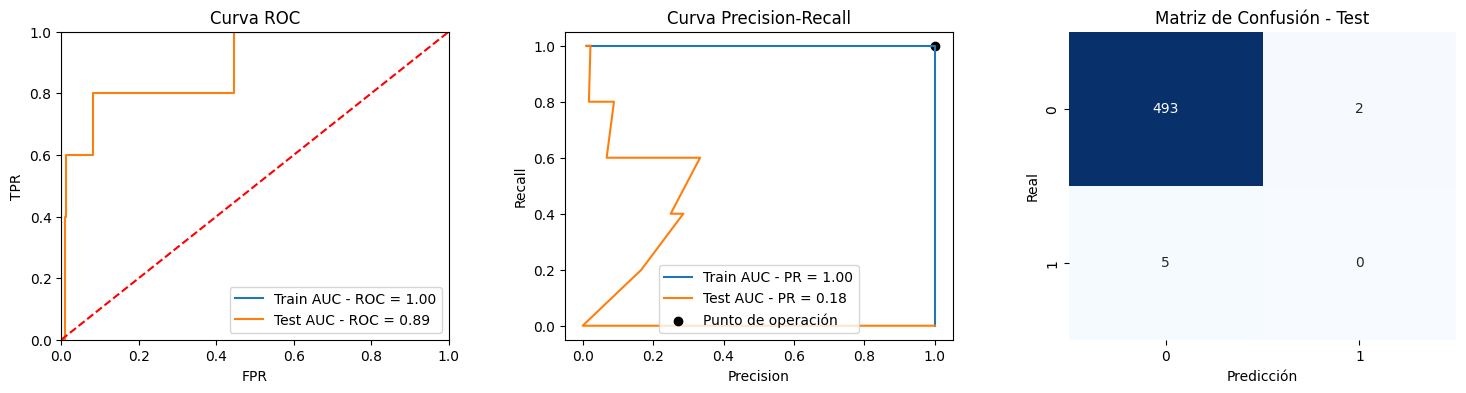

In [26]:
import matplotlib.pyplot as plt
#Librerias para creación y evaluación del modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns


auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

# Calcular los puntos de corte de la curva ROC tanto en train como test
fpr_train, tpr_train, thresholds_roc_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresholds_roc_test = roc_curve(y_test, y_test_pred)

# Encontrar el punto de corte óptimo
optimal_idx_train = np.argmax(tpr_train - fpr_train)
optimal_threshold_train = thresholds_roc_train[optimal_idx_train]
optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_test = thresholds_roc_test[optimal_idx_test]

# grilla de subplots
fig, axs = plt.subplots(1, 3, figsize=(18,4))
axs = axs.ravel() 

# Plotear curva ROC
axs[0].plot(fpr_train, tpr_train, label = 'Train AUC - ROC = %0.2f' % auc_train)
axs[0].plot(fpr_test, tpr_test, label = 'Test AUC - ROC = %0.2f' % auc_test)
axs[0].plot([0, 1], [0, 1],'r--')
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_xlabel('FPR')
axs[0].set_ylabel('TPR')
axs[0].set_title('Curva ROC')
axs[0].legend(loc="lower right")
print(f"Umbral óptimo: {optimal_threshold_train} (Punto más cercano a la esquina [1,1])")

# Calcular precision y recall para distintos umbrales
precision_train, recall_train, thresholds_pr_train = precision_recall_curve(y_train, y_train_pred)
precision_test, recall_test, thresholds_pc_test = precision_recall_curve(y_test, y_test_pred)

# Encontrar el índice del umbral de corte más cercano al valor dado
closest_zero_train = np.argmin(np.abs(thresholds_pr_train - optimal_threshold_train))

# Area bajo la curva
aucpr_train = average_precision_score(y_train, y_train_pred)
aucpr_test = average_precision_score(y_test, y_test_pred)

# Plotear curva precision - recall

axs[1].plot(precision_train, recall_train, label = 'Train AUC - PR = %0.2f' % aucpr_train)
axs[1].plot(precision_test, recall_test, label = 'Test AUC - PR = %0.2f' % aucpr_test)
axs[1].scatter(precision_train[closest_zero_train], recall_train[closest_zero_train], marker='o', color='black', label='Punto de operación' )
axs[1].set_xlabel('Precision')
axs[1].set_ylabel('Recall')
axs[1].set_title('Curva Precision-Recall')
axs[1].legend()


# Plotear matriz de confusion 

# Obtener las predicciones utilizando el umbral óptimo
y_pred_test_int = (gb.predict_proba(X_test)[:,1] >= optimal_threshold_train).astype(int)

# Calcular las matrices de confusión
cm_test = confusion_matrix(y_test, y_pred_test_int)

sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axs[2])
axs[2].set_title('Matriz de Confusión - Test')
axs[2].set_xlabel('Predicción')
axs[2].set_ylabel('Real')

print('Reporte de indicadores en conjunto test usando el umbral óptimo:')
print(classification_report(y_test, y_pred_test_int))

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

